### Logistic Regression Example 1.2
A simple logistic regression model for the **Default** data is plotted. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data
df = pd.read_csv('./data/Default.csv', sep=';')

# Add a numerical column for default
df = df.join(pd.get_dummies(df['default'], 
                            prefix='default', 
                            drop_first=True))

# Index of Yes:
i_yes = df.loc[df['default_Yes'] == 1, :].index

# Random set of No:
i_no = df.loc[df['default_Yes'] == 0, :].index
i_no = np.random.choice(i_no, replace=False, size=333)

# Fit Linear Model, only including the selection of no
i_ = np.concatenate((i_no, i_yes))
x = df.iloc[i_]['balance']
y = df.iloc[i_]['default_Yes']

x_sm = sm.add_constant(x)

model = sm.GLM(y, x_sm, family=sm.families.Binomial())
model = model.fit()

# Find the predicted values
x_pred = x.sort_values()
y_pred = model.predict(sm.add_constant(x_pred))

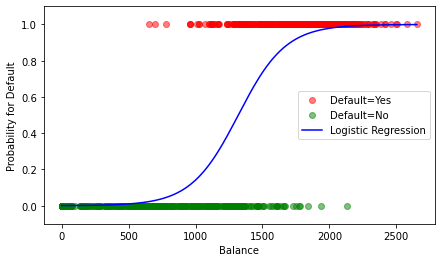

In [2]:
""" Plot """
# Create Figure and subplots
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
# Plot datapoints
plt.plot(df.iloc[i_yes]['balance'], df.iloc[i_yes]['default_Yes'],
         'or', alpha=0.5, label='Default=Yes')
plt.plot(df.iloc[i_no]['balance'], df.iloc[i_no]['default_Yes'], 
         'og', alpha=0.5, label='Default=No')
# Plot fit
plt.plot(x_pred, y_pred, 'b-', label='Logistic Regression')
# Labels and limits
ax.set_xlabel('Balance')
ax.set_ylabel('Probability for Default')
ax.set_ylim(-0.1, 1.1)
plt.legend()
plt.show()               

For small values of **balance** the predicted values for $p(X)$ 
tend to $0$. Likewise, the predictions tend to $1$ for large 
**balance** values. All values of the model are within the 
interval $[0,1]$ and thus interpretable as probabilities. 

### Extra info: 
The graph would look rather different if the complete data would be included:

In [3]:
# Fit logistic model, using all no
x = df['balance']
y = df['default_Yes']

x_sm = sm.add_constant(x)

model = sm.GLM(y, x_sm, family=sm.families.Binomial())
model = model.fit()

# Find the predicted values
x_pred = x.sort_values()
y_pred = model.predict(sm.add_constant(x_pred))

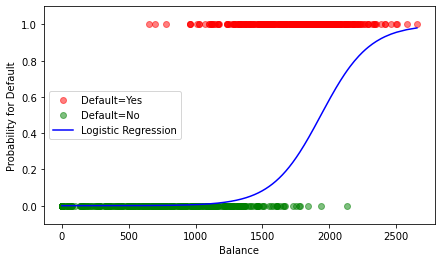

In [4]:
""" Plot """
# Create Figure and subplots
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(111)
# Plot datapoints
plt.plot(df.iloc[i_yes]['balance'], df.iloc[i_yes]['default_Yes'],
         'or', alpha=0.5, label='Default=Yes')
plt.plot(df.iloc[i_no]['balance'], df.iloc[i_no]['default_Yes'], 
         'og', alpha=0.5, label='Default=No')
# Plot fit
plt.plot(x_pred, y_pred, 'b-', label='Logistic Regression')
# Labels and limits
ax.set_xlabel('Balance')
ax.set_ylabel('Probability for Default')
ax.set_ylim(-0.1, 1.1)
plt.legend()
plt.show()                              